# Examples of learning ML

---

> wu.abay@gmail.com

這是我練習ML的第一個範例，嘗試使用決策樹(Decision Tree)，當作第一個範例使用的演算法，選定了演算法後那就取得分析的資料，
在ML的世界中的習慣用語，就是資料集(Data set)，這邊使用鳶尾花資料集(Iris flower data set)．

https://en.wikipedia.org/wiki/Iris_flower_data_set

## Example 1

鳶尾花資料集內容

三種花的品種(target): 

- setosa(0)
- versicolor(1)
- virginica(2)

四個特徵（feature）:

- sepal length(花萼長度)
- sepal width(花萼寬度)
- Petal length(花瓣長度)
- Petal width(花瓣寬度)


### 使用Skearn的datasets模組載入Iris data set

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 使用Sklearn的DecisionTreeClassifier來訓練模型

下面的程式碼會產生一個Model, clf這個Model是使用DescisionTree演算法來訓練

In [3]:
X, y = iris.data, iris.target

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf

DecisionTreeClassifier()

完成訓練後，我們可以對訓練好的Model來打分數，看看模型的準確度為何？

In [4]:
clf.score(X, y)

1.0

### 視覺化訓練的好的模型

由於，我們是使用DecisionTree演算法為基礎的模型，所以，可以預期這個模型基本上就是一個Tree的結構，透過graphviz這個套件，將模型視覺化。

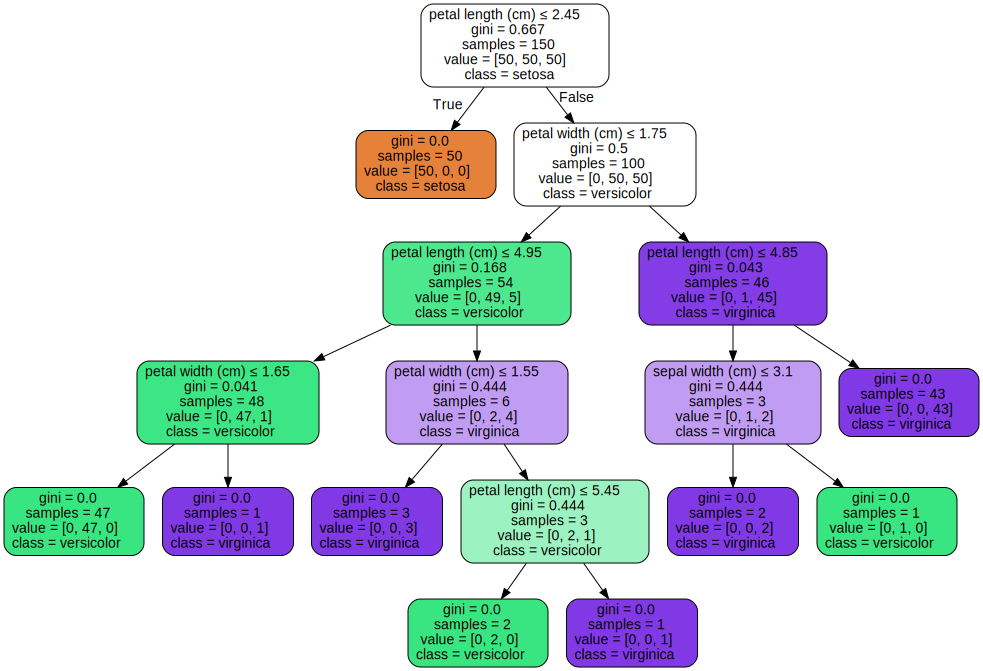

In [5]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### 將資料集切分為訓練用與測試用

使用sklearn中的model_selection的train_test_split方法來將原本的data set切分成訓練使用與測試使用，下面程式碼為例切成80%為訓練用20%為測試使用。

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [8]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [9]:
clf.score(X_test, y_test)

1.0

### 調整演算法DecisionTree的參數

嘗試把樹的深度限定為3，看看是否會影響預測的準確度。

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

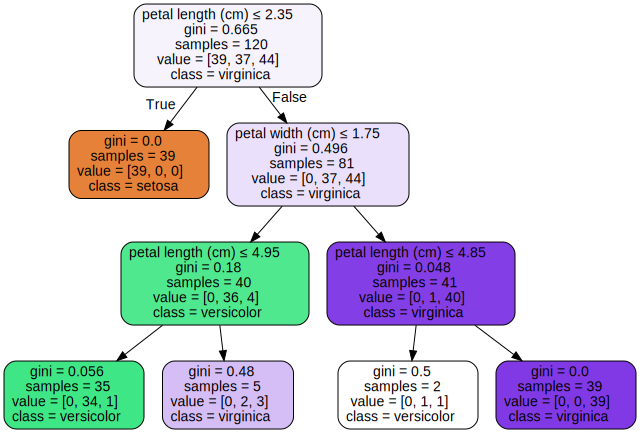

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [12]:
clf.score(X_train, y_train)

0.9666666666666667

In [13]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0])

In [14]:
clf.score(X_test, y_test)

0.9666666666666667